## Medical appointment analysis

A person sets a doctor's appointment and doesn't show up. Why? <br>
In this project, the dataset at hand will be analyzed to try to find out if there are reasons why some patients won't show up for their appointments.<br>
The dataset we are going to use contains 110.527 medical appointments and its 14 associated variables ( PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap', SMS_received, No-show )


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv("/Users/bambino/Documents/DATASETS/medical_appointment_KaggleV2-May-2016.csv")

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [7]:
df.duplicated().any()

True

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#set values to 1 and 0 for easier analysis
df['No-show']=df['No-show'].map({'No':0,'Yes':1})

In [10]:
#convert scheduleday to appropriate datetime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

In [11]:
#convert appointment day to appropriate datetime
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [12]:
df.rename(columns={'Hipertension':'Hypertension','No-show':'Show'},inplace=True)

In [13]:
df.rename(columns={'Handcap':'Handicap'},inplace=True)

In [14]:
Days_inbetween=((df['AppointmentDay'].dt.date)-(df['ScheduledDay'].dt.date)).dt.days
#the days in between schedule and appointment

In [15]:
df.insert(3,'Days_inbetween',Days_inbetween) 

In [16]:
df.Gender.value_counts()

F    71417
M    38475
Name: Gender, dtype: int64

In [17]:
df['Gender']=df['Gender'].str.replace('F','Female').str.replace('M','Male')

In [18]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Days_inbetween,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### What percentage of people didn't show up for  their appointments?

In [19]:
show=df[df['Show']==1]

In [20]:
no_show=df[df['Show']==0]

In [21]:
no_show_percent=(len(no_show)/len(df['Show']))

In [22]:
no_show_percent

0.79891165871947

In [23]:
show_percent=(len(show)/len(df['Show']))

In [24]:
show_percent

0.20108834128052996

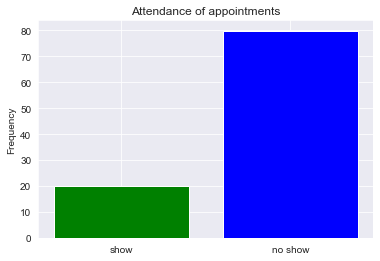

In [25]:
plt.bar(['show','no show'],[show_percent*100,no_show_percent*100],color=['g','b']);
plt.title('Attendance of appointments')
plt.ylabel('Frequency');

### What gender missed the most appointments?

In [26]:
#female_no_show=no_show[no_show['Gender']=='Female']
#female_show=show[show['Gender']=='Female']

In [27]:
#male_no_show=no_show[no_show['Gender']=='Male']
#male_show=show[show['Gender']=='Male']

In [28]:
gen=no_show['Gender'].value_counts()
gen

Female    56962
Male      30832
Name: Gender, dtype: int64

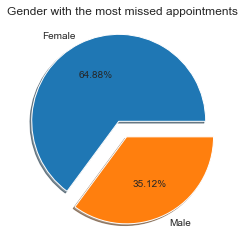

In [29]:
Explode=[0.1,0.1]
plt.pie(gen,labels=gen.index,explode=Explode,autopct='%1.2f%%',shadow=True)
plt.title('Gender with the most missed appointments');

NO-0,YES-1


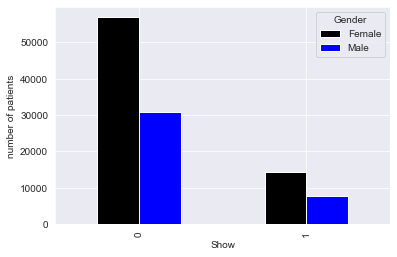

In [30]:
df.groupby(['Gender','Show']).size().unstack('Gender').plot(kind='bar',color=['k','b']).set_ylabel('number of patients')
print('NO-0,YES-1')

Females miss appointments way more than men do.

### Are patients with scholarships more likely to miss appointments?

Text(0, 0.5, 'number of patients')

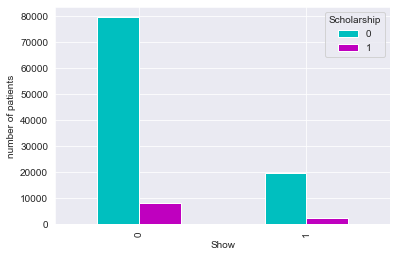

In [31]:
df.groupby(['Scholarship','Show']).size().unstack('Scholarship').plot(kind='bar',color=['c','m']).set_ylabel('number of patients')

In [32]:
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Days_inbetween,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0


In [33]:
df['Days_inbetween'].value_counts().to_frame().head()

,Days_inbetween
0,38478
2,6698
4,5269
1,5162
7,4862


<AxesSubplot:xlabel='Show', ylabel='Days_inbetween'>

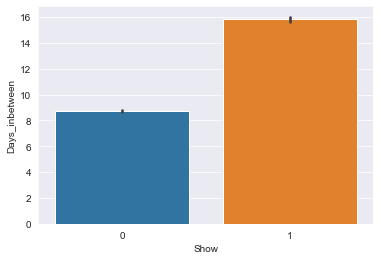

In [34]:
sns.barplot(y=df['Days_inbetween'],x=df['Show'])

The less days between schedule and appointment, the more likely patients are to miss appointments.